In [27]:
import matplotlib.pyplot as plt
import pandas as pd 
import scipy.stats as st
 

In [28]:
mouse = pd.read_csv('data/Mouse_metadata.csv')
study = pd.read_csv('data/Study_results.csv')



In [29]:
#merged CSVs
pyma_df = pd.merge(mouse,study,on = 'Mouse ID', how = 'left')

pyma_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [30]:
#counted # of mice 
pyma_df['Mouse ID'].count()



1893

In [31]:
# found duplicates based on mouse id and timepoint
pyma_dup = pyma_df[pyma_df.duplicated(subset = ['Mouse ID', 'Timepoint'],
                              keep = False)]

pyma_dup

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [32]:
#drop duplicates
pyma_cleandf = pyma_df.drop_duplicates(subset=['Mouse ID','Timepoint'])
#check to see if duplicates were dropped
pyma_cleandf[908:917]

#looks like values are not duplicated but actually flawed, will drop whole mouse by id 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1
918,g989,Propriva,Female,21,26,25,56.045564,1
919,g989,Propriva,Female,21,26,30,59.082294,1
920,g989,Propriva,Female,21,26,35,62.570880,2
921,h246,Ketapril,Male,13,30,0,45.000000,0


In [33]:

#dropped all data for mouse g989 
pyma_cleandf = pyma_df.loc[(pyma_df['Mouse ID']!='g989')]


In [34]:
# mouse count is changed by 13 entries
pyma_cleandf['Mouse ID'].count()

1880

In [35]:
#generate summary statistics of tumor volume by regimen
pyma_groupreg = pyma_cleandf.groupby(['Drug Regimen'])
#mean
meandrug = pyma_groupreg['Tumor Volume (mm3)'].mean()
#median
mediandrug = pyma_groupreg['Tumor Volume (mm3)'].median()
#variance
vardrug = pyma_groupreg['Tumor Volume (mm3)'].var()
#standard deviation
stddrug = pyma_groupreg['Tumor Volume (mm3)'].std()
#standard error of the mean
semdrug = pyma_groupreg['Tumor Volume (mm3)'].sem()

#combine into stats into summary 
drug_statssumm = pd.DataFrame({'Mean': meandrug,
                              'Median' : mediandrug,
                              'Variance': vardrug,
                              'Standard Deviation' : stddrug,
                              'SEM' : semdrug})

drug_statssumm

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [36]:
#using aggregation method - summary stats using single line of code
pyma_groupreg['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Text(0, 0.5, 'measurements')

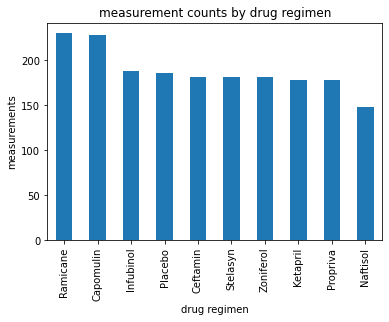

In [37]:
drugnames = pyma_cleandf['Drug Regimen'].unique()
drugtotals = pyma_cleandf['Drug Regimen'].value_counts()

# bar graph showing total measurements by drug regiment
df = pd.DataFrame({'drugs': drugnames, 
                  'totals': drugtotals})

drugmeasures = df.plot.bar(x='drugs', y = 'totals',legend = False,title='measurement counts by drug regimen')

plt.xlabel('drug regimen')

plt.ylabel('measurements')

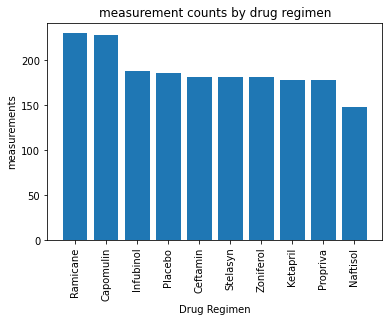

In [38]:
#using pyplot to show previous bargraph
plt.bar(drugnames,drugtotals)

#manipulate bar labels to show full-name
labels = [x for x in drugnames]

plt.xticks(labels, drugnames,rotation=90)

plt.xlabel('Drug Regimen')
plt.ylabel('measurements')
plt.title('measurement counts by drug regimen')

plt.show()


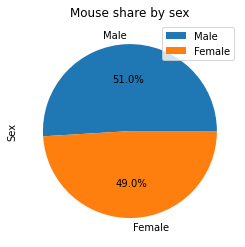

In [39]:
#creating series to plot
mousesex=pyma_cleandf['Sex'].value_counts()

#create dataframe to plot
dfms=pd.DataFrame(mousesex)

#use pandas plot
dfms.plot.pie(y='Sex',autopct = '%1.1f%%',title=('Mouse share by sex'))



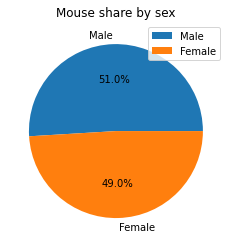

In [40]:
#pie chart using pyplot
sexes = pyma_cleandf['Sex'].unique()

#easily added percentages
plt.pie(mousesex,labels = sexes, autopct = '%1.1f%%')
#include legend
plt.legend(loc = 'best')

plt.title('Mouse share by sex')

plt.show()

In [41]:
#new dataframe with only selected drug types in regimen

pyma_bydrug = pyma_cleandf.loc[((pyma_cleandf['Drug Regimen'] =='Ramicane') | (pyma_cleandf['Drug Regimen'] =='Infubinol') | (pyma_cleandf['Drug Regimen'] =='Ceftamin') | (pyma_cleandf['Drug Regimen'] =='Capomulin'))]



In [42]:
#create dataframe that shows the last occurence of a Mouse's ID corresponding with it's final Timepoint

max_timepoint = pyma_bydrug.groupby('Mouse ID')['Timepoint']

max_time = pd.DataFrame(max_timepoint.max())

mouse_endpoint = pd.merge(max_time,pyma_bydrug, how = 'outer', on = 'Mouse ID')

mouse_endpoint



,Mouse ID,Timepoint_x,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y,Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,0,45.000000,0
1,a203,45,Infubinol,Female,20,23,5,48.508468,0
2,a203,45,Infubinol,Female,20,23,10,51.852437,1
3,a203,45,Infubinol,Female,20,23,15,52.777870,1
4,a203,45,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...,...
809,z581,45,Infubinol,Female,24,25,25,54.316407,2
810,z581,45,Infubinol,Female,24,25,30,56.286750,2
811,z581,45,Infubinol,Female,24,25,35,58.628399,3
812,z581,45,Infubinol,Female,24,25,40,60.053740,3


In [43]:
#created list of treatments
treatments = pyma_bydrug['Drug Regimen'].unique()
#create list to fill with values
tumorvols = []

#using for loop,.lco, treatments [] and conditionals, appended a list of tumor vols by drug regimen 
for e in treatments: 
    #created dataframe for each treatment value
    by_treat = mouse_endpoint.loc[(mouse_endpoint['Drug Regimen']== e)]
    #created dataframe where final timepoint corresponded with the original dataframe before merges final timepoint
    final_time=by_treat.loc[(by_treat['Timepoint_x']==by_treat['Timepoint_y'])]
    #pulled value from tumorvolume from column of last dataframe created and append to list
    tumorvols.append(final_time['Tumor Volume (mm3)'])
    
  
    #grouped the dataframe with end timepoints/tumor volume by drug regimen 

mouse_endgroup = mouse_endpoint.groupby(['Drug Regimen'])
    #created quartiles for each drug group using tumor volume data 

quartiles = mouse_endgroup['Tumor Volume (mm3)'].quantile([0.25,0.5,.75])



In [44]:
quartiles

Drug Regimen      
Capomulin     0.25    37.685933
              0.50    41.557809
              0.75    45.000000
Ceftamin      0.25    47.208427
              0.50    51.776157
              0.75    56.801438
Infubinol     0.25    47.312353
              0.50    51.820584
              0.75    57.314444
Ramicane      0.25    36.674635
              0.50    40.673236
              0.75    45.000000
Name: Tumor Volume (mm3), dtype: float64

In [45]:
cap_lowq = quartiles['Capomulin', 0.25]
cap_highq = quartiles['Capomulin', 0.75]
cap_iqr = cap_highq - cap_lowq 

cap_lowb = cap_lowq - (1.5*cap_iqr)

cap_highb = cap_highq + (1.5*cap_iqr)

print(f'values below {cap_lowb} could be outliers in Capomulin group.')
print(f'values above {cap_highb} could be outliers in Capomulin group.')

values below 26.714832162499995 could be outliers in Capomulin group.
values above 55.9711007025 could be outliers in Capomulin group.


In [46]:
ram_lowq = quartiles['Ramicane', 0.25]
ram_highq = quartiles['Ramicane', 0.75]
ram_iqr = ram_highq - ram_lowq 

ram_lowb = ram_lowq - (1.5*ram_iqr)

ram_highb = ram_highq + (1.5*ram_iqr)

print(f'values below {ram_lowb} could be outliers in Ramicane group.')
print(f'values above {ram_highb} could be outliers in Ramicane group.')

values below 24.1865864625 could be outliers in Ramicane group.
values above 57.488048122500004 could be outliers in Ramicane group.


In [47]:
inf_lowq = quartiles['Infubinol', 0.25]
inf_highq = quartiles['Infubinol', 0.75]
inf_iqr = inf_highq - inf_lowq 

inf_lowb = inf_lowq - (1.5*inf_iqr)

inf_highb = inf_highq + (1.5*inf_iqr)

print(f'values below {inf_lowb} could be outliers in Infubinol group.')
print(f'values above {inf_highb} could be outliers in Infubinol group.')

values below 32.309217298749985 could be outliers in Infubinol group.
values above 72.31757996875001 could be outliers in Infubinol group.


In [48]:
cef_lowq = quartiles['Ceftamin', 0.25]
cef_highq = quartiles['Ceftamin', 0.75]
cef_iqr = cef_highq - inf_lowq 

cef_lowb = cef_lowq - (1.5*inf_iqr)

cef_highb = cef_highq + (1.5*inf_iqr)

print(f'values below {cef_lowb} could be outliers in Ceftamin group.')
print(f'values above {cef_highb} could be outliers in Ceftamin group.')

values below 32.20529111124999 could be outliers in Ceftamin group.
values above 71.80457357125002 could be outliers in Ceftamin group.


Text(0.5, 1.0, 'final tumor volumes by drug regimen')

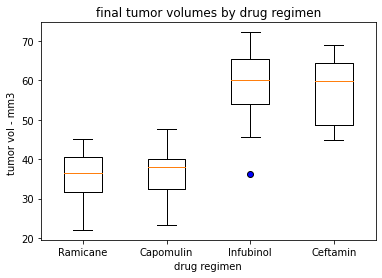

In [49]:
#colored outlier blue
flierprops=dict(markerfacecolor='blue')
#plotted/formatted and labeled graph
plt.boxplot(tumorvols,flierprops = flierprops)

tlocations = [1,2,3,4]
plt.xticks(tlocations,treatments)
plt.ylabel('tumor vol - mm3 ')
plt.xlabel('drug regimen')
plt.title('final tumor volumes by drug regimen')

In [50]:
# located by capomulin 
capo_mouse = pyma_df.loc[(pyma_df['Drug Regimen']=='Capomulin')]
#choose mouse ID 

c_mouse = 'r157'

#locate data for c_mouse
mouse157 = capo_mouse.loc[(capo_mouse['Mouse ID']==c_mouse)]


In [51]:
mouse157

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0
1455,r157,Capomulin,Male,22,25,15,46.539206,0


In [52]:
times = mouse157['Timepoint']
tumor157 = mouse157['Tumor Volume (mm3)']

([<matplotlib.axis.XTick at 0x28fedbfcb00>,
 <a list of 4 Text major ticklabel objects>)

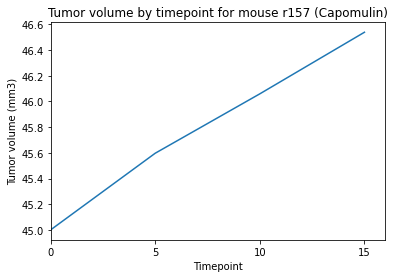

In [53]:
plt.plot(times, tumor157)

plt.xlabel('Timepoint'
          )
plt.ylabel('Tumor volume (mm3)')

plt.title('Tumor volume by timepoint for mouse r157 (Capomulin)')

plt.xlim(0,16)

xlocs=[0,5,10,15]
plt.xticks(xlocs)

In [54]:
#used dataframe that was grouped by drug to group by drug and weight
pyma_bydrug_grp = pyma_bydrug.groupby(['Drug Regimen','Weight (g)'])



In [55]:
tumor_weight = pyma_bydrug_grp.mean()

capo_tumorweight = tumor_weight.xs(key='Capomulin').reset_index()


capoweight = capo_tumorweight['Weight (g)']


capotumorvol = capo_tumorweight['Tumor Volume (mm3)']

In [56]:
#found values to draw line 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capoweight, capotumorvol)
#found correlation between mouse weight and avg.tumor vol
corr = st.pearsonr(capoweight,capotumorvol)

print(f'the correlation between mouse weight and average tumor size is {round(corr[0],2)}')

the correlation between mouse weight and average tumor size is 0.95


Text(0.5, 1.0, 'Avg. Tumor volume by mouse weight for mice treated with Capomulin')

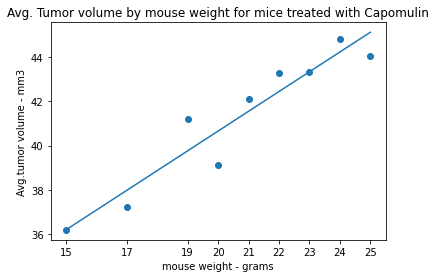

In [69]:
regress = capoweight * slope + intercept 
plt.scatter(capoweight,capotumorvol)
plt.plot(capoweight, regress)
xlocs = capoweight.unique()
plt.xticks(xlocs)
plt.ylabel('Avg.tumor volume - mm3')
plt.xlabel('mouse weight - grams')
plt.title('Avg. Tumor volume by mouse weight for mice treated with Capomulin')